In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
SEED = 42
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hIjLXNNbkyWUZ7edL9KhJHcs8NaKw7JK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hIjLXNNbkyWUZ7edL9KhJHcs8NaKw7JK" -O Data_task.rar && rm -rf /tmp/cookies.txt

--2021-03-18 18:03:59--  https://docs.google.com/uc?export=download&confirm=1Xf_&id=1hIjLXNNbkyWUZ7edL9KhJHcs8NaKw7JK
Resolving docs.google.com (docs.google.com)... 216.58.192.78, 2607:f8b0:4026:802::200e
Connecting to docs.google.com (docs.google.com)|216.58.192.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/4n2vrf5vk875ki03gvqhk0s1hf2vfdps/equmapaub0i84bevlcub7ecov4jnga7h/1616090625000/02870872282210761626/00107851151867156868Z/1hIjLXNNbkyWUZ7edL9KhJHcs8NaKw7JK?e=download [following]
--2021-03-18 18:03:59--  https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/4n2vrf5vk875ki03gvqhk0s1hf2vfdps/equmapaub0i84bevlcub7ecov4jnga7h/1616090625000/02870872282210761626/00107851151867156868Z/1hIjLXNNbkyWUZ7edL9KhJHcs8NaKw7JK?e=download
Resolving doc-0g-0k-docs.googleusercontent.com (doc-0g-0k-docs.googleusercontent.com)... 216.58.192.97, 2607:f8b0:4026:803::2001
Connecting to doc-0g-0

In [4]:
!unrar x Data_task.rar 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Data_task.rar

Creating    hackaton                                                  OK
Extracting  hackaton/aggregates.csv                                        0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62%  OK 
Extracting  hackaton/aggregates.xlsx                                      62%  OK 
Extracting  hackaton/transactions.csv                                     62% 63% 64% 65% 66% 67% 68% 69% 70%

In [5]:
aggregates = pd.read_csv('/content/hackaton/aggregates.csv')
transactions = pd.read_csv('/content/hackaton/transactions.csv')
aggregates_help = pd.read_excel('/content/hackaton/aggregates.xlsx')
transactions_help = pd.read_excel('/content/hackaton/transactions.xlsx')

In [6]:
transactions_help

,Unnamed: 0,Атрибут,Описание атрибута
0,0,client_id,Замаскированный ID клиента
1,1,last_day_month,Отчетная дата
2,2,mcc_group,Группа МСС
3,3,att_sum,Сумма транзакций
4,4,att_cnt,Количество транзакций
5,5,att_sum_min,Минимальная транзакция
6,6,att_sum_max,Максимальная транзакция
7,7,att_sum_avg,Средняя транзакция


# Взглянем на данные

In [7]:
aggregates_help['Описание атрибута']

0                             Замаскированный ID клиента
1                                          Отчетная дата
2      количество зарплатных начислений, за последний...
3      количество зарплатных начислений, за последние...
4      количество зарплатных начислений, за последние...
                             ...                        
215    общее число просрочек до 29 дней в банке за 5 лет
216    общее число просрочек от 30 до 59 дней в банке...
217    общее число просрочек от 60 до 89 дней в банке...
218    общее число просрочек от 90 до 119 дней в банк...
219    общее число просрочек от 120 дней в банке за 5...
Name: Описание атрибута, Length: 220, dtype: object

In [8]:
aggregates_10 = aggregates.loc[:, (aggregates.isnull().mean() < 0.10)]

In [9]:
aggregates.select_dtypes(include=['object'])

,report_date,app_rel_status,app_education_nm,app_industry_nm,app_employment_type_nm,app_position_type_nm,app_client_category,cre_date
0,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-01 00:00:00,женат / замужем,Высшее,Другое,Основная сфера деят-ти,не руководящий сотрудник,Клиенты розничного кредитования,2019-02-26 00:00:00
4,2019-11-01 00:00:00,,,ТЭК/ химия и нефтехимия,0,,"Сотрудники Группы ГПБ, Группы Газпром и сотруд...",NaN
...,...,...,...,...,...,...,...,...
177958,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177959,2020-02-01 00:00:00,Женат/Замужем,Среднее специальное,,0,,Прочие физические лица,2019-07-24 00:00:00
177960,2020-02-01 00:00:00,,,ТЭК/ химия и нефтехимия,0,,"Сотрудники Группы ГПБ, Группы Газпром и сотруд...",2017-02-08 00:00:00
177961,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
aggregates_help.values

array([[0, 'client_id', 'Замаскированный ID клиента'],
       [1, 'report_date', 'Отчетная дата'],
       [2, 'cnt_zp_1m',
        'количество зарплатных начислений, за последний месяц'],
       [3, 'cnt_zp_3m',
        'количество зарплатных начислений, за последние 3 месяца'],
       [4, 'cnt_zp_6m',
        'количество зарплатных начислений, за последние 6 месяцев'],
       [5, 'cnt_zp_12m',
        'количество зарплатных поступлений за 12 месяцев'],
       [6, 'downlimit_count', 'количество снижений кредитного лимита'],
       [7, 'uplimit_count', 'количество увеличения кредитного лимита'],
       [8, 'limit_exchange_count', 'общее количество изменений лимита'],
       [9, 'cur_credit_limit', 'текущий установленный лимит'],
       [10, 'cur_cr_lim_month',
        'время в месяцах, прошедшее с установления текущего лимита'],
       [11, 'prev_credit_limit', 'предыдущий лимит'],
       [12, 'max_outstanding_amount_1m',
        'максимальная задолженность по од за месяц'],
       [13,

In [11]:
aggregates[['client_id','report_date','cl_open','cl_closed']]\
            [(aggregates.cnt_opened == 0) & (aggregates.cnt_closed == 0)]

,client_id,report_date,cl_open,cl_closed
21,8881,2019-11-01 00:00:00,0.0,0.0
237,5978,2019-11-01 00:00:00,0.0,0.0
346,7332,2019-11-01 00:00:00,0.0,0.0
599,6620,2019-11-01 00:00:00,0.0,0.0
764,9321,2019-02-01 00:00:00,0.0,0.0
...,...,...,...,...
176813,2198,2019-05-01 00:00:00,0.0,0.0
176933,6620,2019-05-01 00:00:00,0.0,0.0
177053,4029,2020-02-01 00:00:00,0.0,0.0
177134,8881,2020-02-01 00:00:00,0.0,0.0


### Предобработка

In [12]:
df1 = aggregates.copy()
# Удаляем записи с нанами в cl_open и cl_closed
df1 = df1.drop(df1[df1['cl_open'].isnull()].index.values)
df1 = df1.drop(df1[df1['cl_closed'].isnull()].index.values)

df1 = df1.sort_values(by=['client_id', 'report_date'])

# Первый подход

Формируем таргет из двух фичей: cl_open и cl_closed - количество открытых и закрытых на данных момент потребительских кредитов.
Cуммируем количество открытых на данный момент счетов и количество закрытых, чтобы получить суммарное кол-во счетов


In [13]:
df1 = df1.copy()
df1['cl_total'] = df1['cl_open'] + df1['cl_closed']

Смотрим, увеличилось ли количесвто открытых счетов в следующий месяц, и так для каждого месяца и клиента. Если увеличилось,
записываем 1, если нет - 0.

In [14]:
df1['target'] = ((df1.cl_total.shift(-1) - df1.cl_total) > 0).astype(int)

In [15]:
# Удаляем последнюю запись каждого клиента, так как она не информативна
last_date = df1.drop_duplicates('client_id',keep='last')
df1 = df1.drop(last_date.index.values)

In [16]:
# классы
df1.target.value_counts()

0    90734
1     4599
Name: target, dtype: int64

In [17]:
# дропаем ненужные фичи
df1 = df1.drop(['cre_date'],axis=1)

### Кодирование категориальных фичей

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [19]:
# заменяем наны и пропуски на нули
df1.reset_index(inplace=True,drop=True)

df_slice = df1.select_dtypes(include=['object']).copy().iloc[:,1:]
df_slice.fillna(0,inplace=True)
df_slice.replace(' ',0,inplace=True)
df_slice = df_slice.astype(str)

In [20]:
# энкодим
df_slice_enc = pd.DataFrame(encoder.fit_transform(df_slice))
df1 = df1.drop(df_slice.columns.values,axis=1)
df1 = df1.join(df_slice_enc)

### Кодирование report_date

In [21]:
df1['report_date'] = df1.report_date.astype('datetime64[ns]')

In [22]:
df1['dayofweek'] = df1['report_date'].dt.dayofweek
df1['quarter'] = df1['report_date'].dt.quarter
df1['month'] = df1['report_date'].dt.month
df1['year'] = df1['report_date'].dt.year
df1['weekofyear'] = df1['report_date'].dt.weekofyear

In [23]:
df1 = df1.sort_values(by='report_date')

### Оставшиеся НаНы

In [24]:
# мода
# df1 = df1.fillna(df1.mode(dropna=True).iloc[0])

In [25]:
# медиана
df1 = df1.fillna(df1.mean())

In [26]:
# df1 = df1.fillna(0)

### Строим модель

In [27]:
df1.reset_index(inplace=True,drop=True)

In [28]:
X = df1.drop(['target','client_id','report_date'], axis = 1)
y = df1.target

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import plot_importance
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
# Делим на трейн и тест. Так как данные расположены во времени, то test - это 'будущее' трейна

tscv2 = TimeSeriesSplit(n_splits=2,test_size=int(X.shape[0]*0.2))
for train_index, test_index in tscv2.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [    0     1     2 ... 57198 57199 57200] TEST: [57201 57202 57203 ... 76264 76265 76266]
TRAIN: [    0     1     2 ... 76264 76265 76266] TEST: [76267 76268 76269 ... 95330 95331 95332]


In [31]:
xgb_class = xgb.XGBClassifier(random_state  = SEED)
rf_class = RandomForestClassifier(random_state=SEED)

model = xgb_class

In [32]:
# Кросс валидация тоже должна учитывать, что данные расположены во времени
tscv = TimeSeriesSplit(5)
cross_validate(model, X_train, y_train, cv=tscv, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


{'fit_time': array([ 9.70852447, 18.77127695, 27.89867735, 38.66182375, 48.97545791]),
 'score_time': array([0.11974144, 0.13183928, 0.13156319, 0.13369679, 0.1350975 ]),
 'test_score': array([0.        , 0.        , 0.        , 0.08951126, 0.        ])}

In [33]:
model.fit(X_train,y_train)

XGBClassifier(random_state=42)

In [34]:
y_pred = (model.predict(X_test))
print('ROC AUC: ',roc_auc_score(y_test ,y_pred),
      '\nRecall:  ',recall_score(y_test ,y_pred),
      '\nF1 score:',f1_score(y_test ,y_pred))

ROC AUC:  0.5 
Recall:   0.0 
F1 score: 0.0


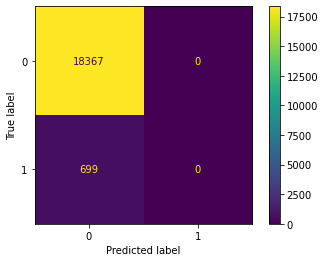

In [35]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred)).plot()

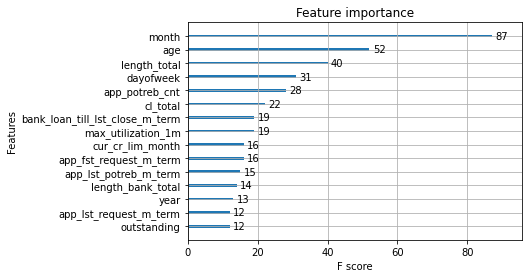

In [36]:
plot_importance(xgb_class,max_num_features = 15)

### Вывод
Модель - случайный классификатор ¯\_(ツ)_/¯ . Пробуем второй подход

# Подход 2

In [37]:
df2 = aggregates.copy()
df2 = df2.sort_values(by=['client_id', 'report_date'])

In [38]:
# данные за последний месяц
df_last_month = df2[df2.report_date >= '2020-10-01'].copy()

Итак, рассмотрим три фичи, из которых будем формировать таргет. Первые две это cl_open и cl_closed - количество открытых и закрытых на данных момент потребительских кредитов.

In [39]:
df_last_month['cl_open'].value_counts()

0.0     4027
1.0     1377
2.0      542
3.0      163
4.0       87
5.0       17
6.0       12
7.0        6
8.0        3
12.0       2
9.0        1
10.0       1
14.0       1
Name: cl_open, dtype: int64

In [40]:
df_last_month['cl_closed'].value_counts()

0.0      2248
1.0       836
2.0       614
3.0       487
4.0       399
5.0       329
6.0       264
7.0       211
8.0       197
9.0       123
10.0      107
11.0      102
12.0       66
13.0       48
14.0       41
15.0       32
18.0       19
16.0       17
17.0       14
19.0       13
20.0       13
22.0       12
21.0        8
25.0        5
24.0        4
23.0        4
28.0        4
27.0        3
33.0        2
35.0        2
30.0        2
26.0        2
37.0        2
36.0        1
49.0        1
38.0        1
31.0        1
121.0       1
42.0        1
34.0        1
62.0        1
92.0        1
Name: cl_closed, dtype: int64

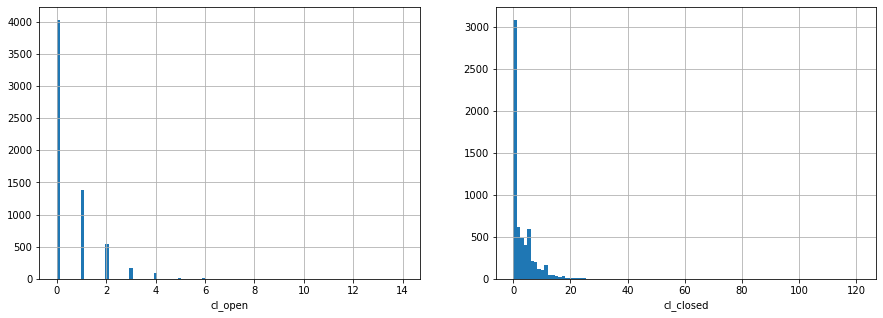

In [41]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(df_last_month['cl_open'],bins=100)
ax[0].grid()
ax[0].set(xlabel='cl_open')

ax[1].hist(df_last_month['cl_closed'],bins=100)
ax[1].grid()
ax[1].set(xlabel='cl_closed')
plt.show()

Из вывода и графиков видно, что cl_open > 6 можно рассматривать как выбросы, аналогично с cl_closed > 20

In [42]:
df_last_month = df_last_month.drop(df_last_month[df_last_month['cl_open']>5].index.values)
df_last_month = df_last_month.drop(df_last_month[df_last_month['cl_closed']>20].index.values)

Рассмотрим еще одну фичу: first_opened - время в месяцах, прошедшее с даты открытия самого раннего счёта

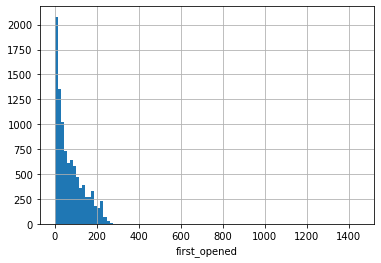

In [43]:
plt.hist(df_last_month['first_opened'],bins=100)
plt.xlabel('first_opened')
plt.grid()
plt.show()

Дата основания Газпромбанка 1990 год. То есть за 30 лет прошло  360 месяцев. first_opened > 360 - точно выбросы. Также имеет смысл удалить записи c временем, прошедшим с даты открытия самого раннего счёта меньше месяца, те first_opened < 1. Это обусловлено как тем, что так у метрики не будет очень больших значений, а также тем, что об этих людям мы мало чего знаем.

In [44]:
df_last_month = df_last_month.drop(df_last_month[(df_last_month['first_opened']>360) \
                                                 | (df_last_month['first_opened']<1)].index.values)

In [45]:
# есть еще 20 нанов, их можно удалить
df_last_month = df_last_month.drop(df_last_month[df_last_month['first_opened'].isnull()].index.values)
# также есть клиент, у которого first_opened = 0, тоже удаляем
df_last_month = df_last_month.drop(df_last_month[df_last_month['first_opened']==0].index.values)

Скорее всего это не все выбросы, но по крайней мере мы избавились от тех, что влияют на наш таргет

Итак, формируем таргет

In [46]:
# суммируем количество открытых на данный момент кредитов и количество закрытых, чтобы получить суммарное кол-во счетов
df_last_month['cl_total'] = df_last_month['cl_open'] + df_last_month['cl_closed']

# таргет - как часто клиент берет кредит: делим колчиество открытих потреб. кредитов на время в месяцах, 
# прошедшее с даты открытия первого  
df_last_month['target'] = df_last_month['cl_total'] / df_last_month['first_opened']

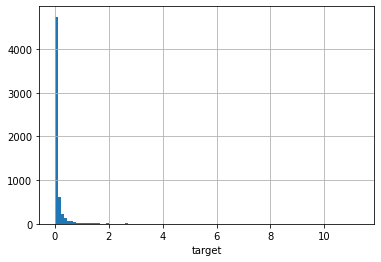

In [47]:
plt.hist(df_last_month['target'],bins=100)
plt.xlabel('target')
plt.grid()
plt.show()

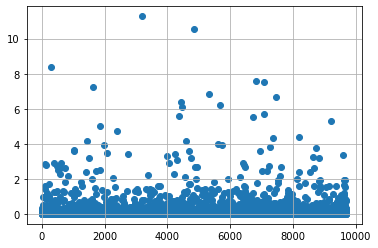

In [48]:
plt.scatter([i for i in range(df_last_month.shape[0])],df_last_month['target'])
plt.grid()
plt.show()

Разделим таргет на два класса: первая - таргет больше среднего значения, вторая - меньше. Запишем как новый таргет

In [49]:
df_last_month['target'] = (df_last_month['target']>df_last_month['target'].mean()).astype(int)

In [50]:
df2_1 = df_last_month

### Обработка, аналогичная первой модели

In [51]:
# дропаем ненужные фичи а также first_opened и cl_total
df2_1 = df2_1.drop(['cre_date','report_date','first_opened','cl_total'],axis=1)

In [52]:
encoder = OneHotEncoder(sparse=False)

In [53]:
# заменяем наны и пропуски на нули
df2_1.reset_index(inplace=True,drop=True)

df_slice = df2_1.select_dtypes(include=['object']).copy()
df_slice.fillna(0,inplace=True)
df_slice.replace(' ',0,inplace=True)
df_slice = df_slice.astype(str)

In [54]:
# энкодим
df_slice_enc = pd.DataFrame(encoder.fit_transform(df_slice))
df2_1 = df2_1.drop(df_slice.columns.values,axis=1)
df2_1.reset_index(inplace=True,drop=True)
df2_1 = df2_1.join(df_slice_enc)

In [55]:
df2_1 = df2_1.fillna(df2_1.mean())

### Строим модель

In [56]:
X = df2_1.drop(['target','client_id'], axis = 1)
y = df2_1.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=SEED)

In [58]:
xgb_class = xgb.XGBClassifier(random_state  = SEED)
rf_class = RandomForestClassifier(random_state=SEED)
logreg = LogisticRegression()

model = xgb_class

In [59]:
cross_validate(model, X_train, y_train, cv=5, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.2s finished


{'fit_time': array([4.56527281, 4.5377841 , 4.3339994 , 4.32443357, 4.29569888]),
 'score_time': array([0.01933384, 0.01894641, 0.01833367, 0.01863337, 0.01856518]),
 'test_score': array([0.83815029, 0.81733746, 0.82461538, 0.78078078, 0.80120482])}

In [60]:
model.fit(X_train,y_train)

XGBClassifier(random_state=42)

In [61]:
y_pred = (model.predict(X_test))
print('ROC AUC: ',roc_auc_score(y_test ,y_pred),
      '\nRecall:  ',recall_score(y_test ,y_pred),
      '\nF1 score:',f1_score(y_test ,y_pred))

ROC AUC:  0.8897541043202606 
Recall:   0.7983539094650206 
F1 score: 0.8272921108742005


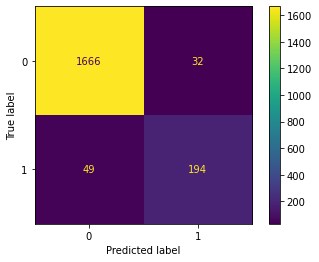

In [62]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred)).plot()

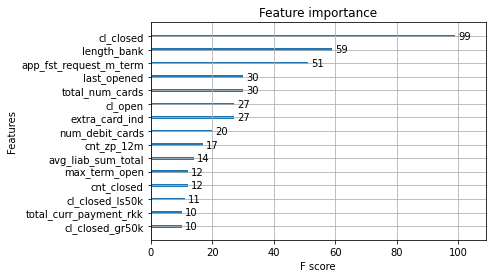

In [63]:
plot_importance(xgb_class,max_num_features = 15)

### Добавим transactions

In [64]:
# есть выбросы, в которых средняя сумма слишком большая. Удаляем
transactions = transactions[transactions.att_sum_avg<100000]

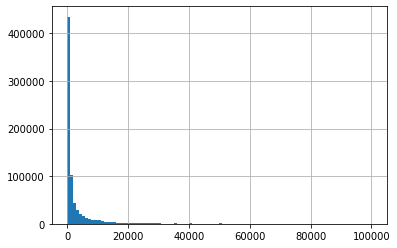

In [65]:
plt.hist(transactions.att_sum_avg,bins=100)
plt.grid()
plt.show()

In [66]:
dummies = pd.get_dummies(transactions.mcc_group)
dummies = dummies * transactions.att_cnt.values.reshape(-1,1)
df_groups = transactions.client_id.to_frame().join(dummies)

In [67]:
df_groups = df_groups.groupby('client_id').sum().reset_index()

In [68]:
df3 = df2_1.merge(df_groups,on='client_id', how='inner')

### Строим модель

In [69]:
X = df3.drop(['target','client_id'], axis = 1)
y = df3.target

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=SEED)

In [71]:
xgb_class = xgb.XGBClassifier(random_state  = SEED)
rf_class = RandomForestClassifier(random_state=SEED)
logreg = LogisticRegression()

model = xgb_class

In [72]:
cross_validate(model, X_train, y_train, cv=5, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.5s finished


{'fit_time': array([4.69221902, 4.69580984, 4.66637635, 4.66354322, 4.66594362]),
 'score_time': array([0.02085376, 0.02029085, 0.02029848, 0.02033997, 0.02050948]),
 'test_score': array([0.81345566, 0.83094556, 0.82997118, 0.8       , 0.78481013])}

In [73]:
model.fit(X_train,y_train)

XGBClassifier(random_state=42)

In [74]:
y_pred = (model.predict(X_test))
print('ROC AUC: ',roc_auc_score(y_test ,y_pred),
      '\nRecall:  ',recall_score(y_test ,y_pred),
      '\nF1 score:',f1_score(y_test ,y_pred))

ROC AUC:  0.8603494644039693 
Recall:   0.7424892703862661 
F1 score: 0.781038374717833


Качество ухудшилось

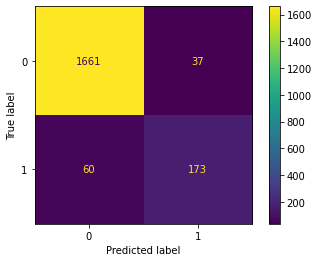

In [75]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred)).plot()

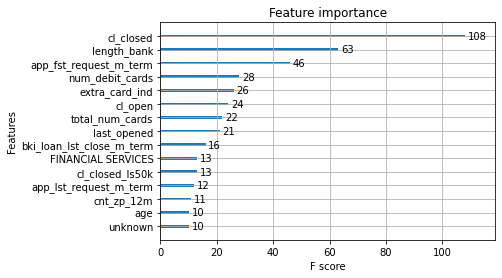

In [76]:
plot_importance(xgb_class,max_num_features = 15)